# Verifying that lateral GABA inhibtion affects firing rate in a population

In [1]:
%matplotlib inline

import os
import numpy as np
network_path = os.path.join("..", "networks", "sten_1")
network_file = os.path.join(network_path, "network-synapses-minimal.hdf5")
simulation_file_with_synapses = os.path.join(network_path, "simulation", "output-with-synapses-sten_1-A.hdf5")
simulation_file_no_synapses = os.path.join(network_path, "simulation", "output-no-synapses-sten_1-A.hdf5")
duration = 18

# Plot network

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/sten_1/network-config.json
Population unit 0 has 32000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 0 has 32000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


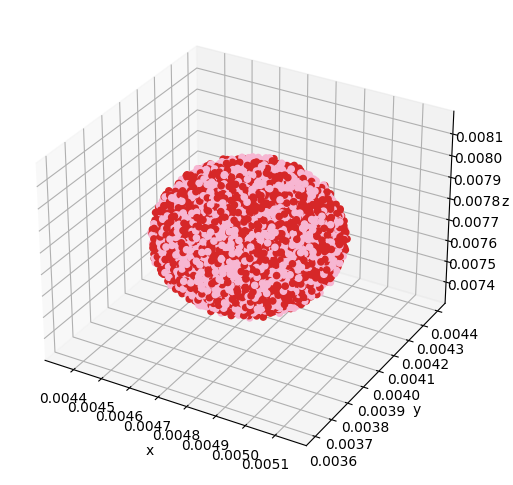

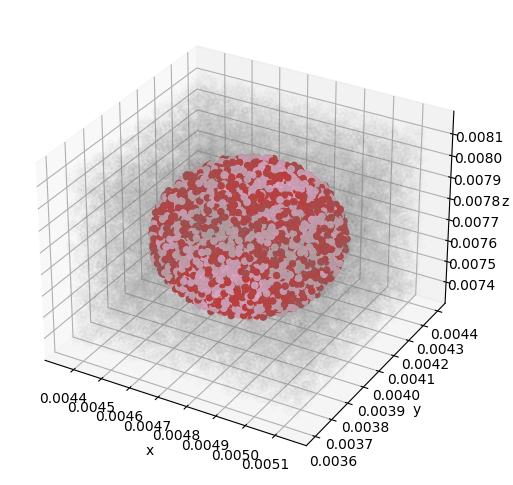

In [2]:
from snudda.plotting import PlotNetwork

pn = PlotNetwork(network_path)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/sten_1/network-config.json
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


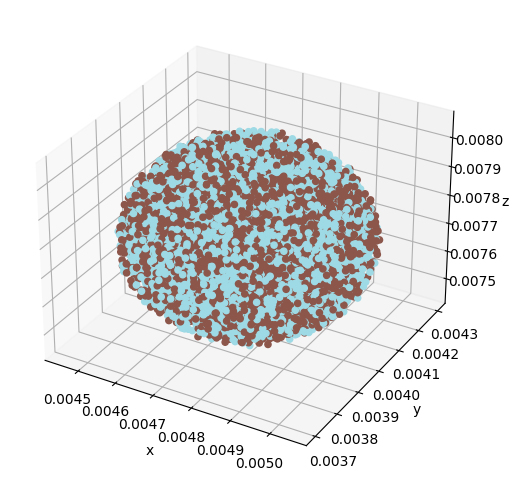

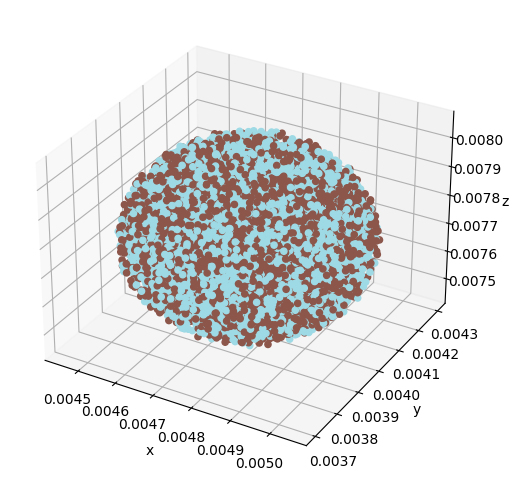

In [3]:
from snudda.plotting import PlotNetwork

pn2 = PlotNetwork(network_file)
pn2.plot_populations(unmarked_alpha=0)
pn2.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn2.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

# Plot neuron input

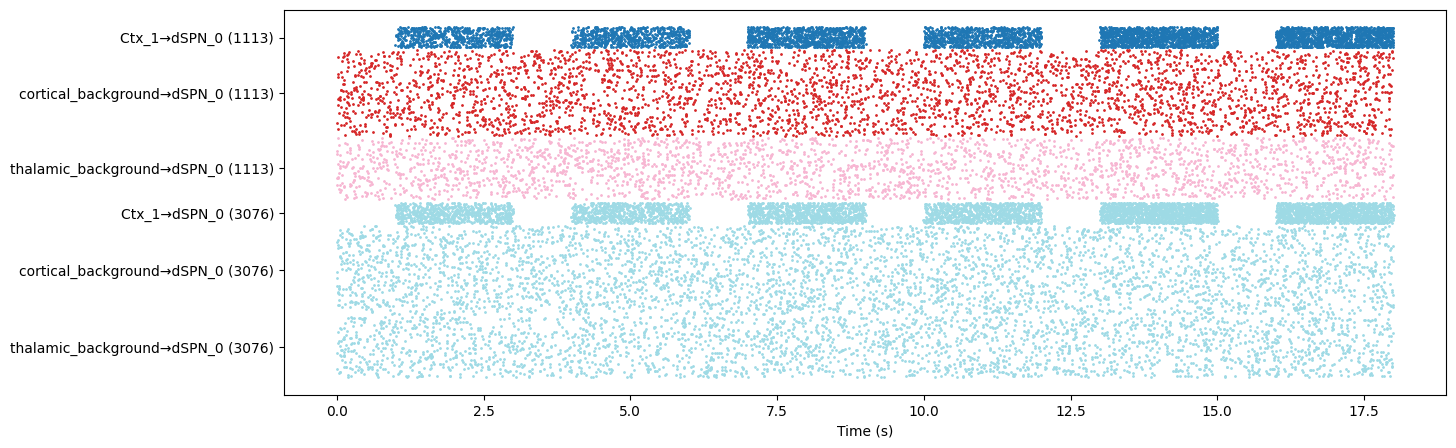

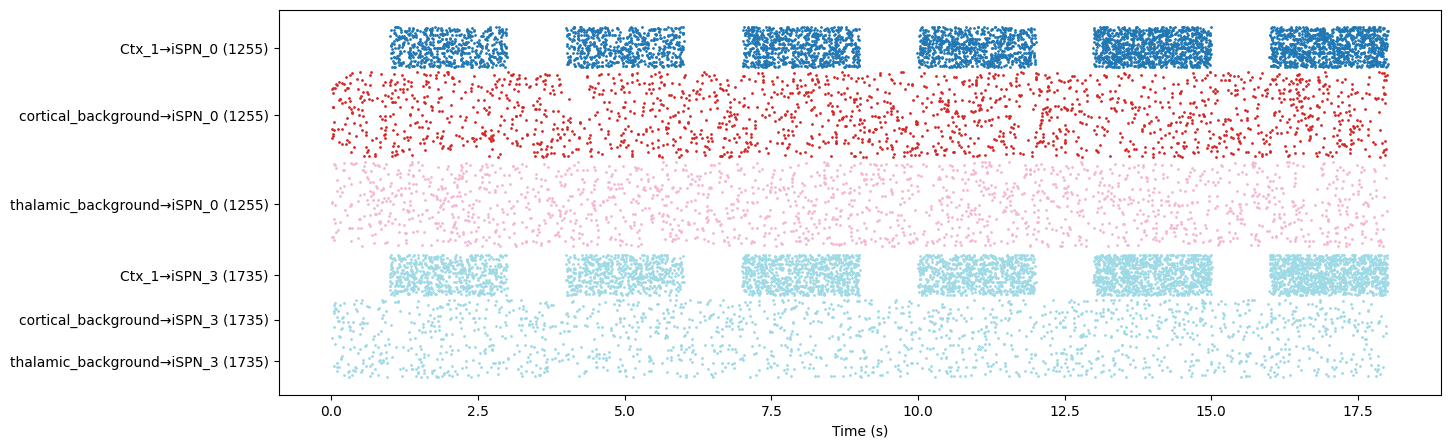

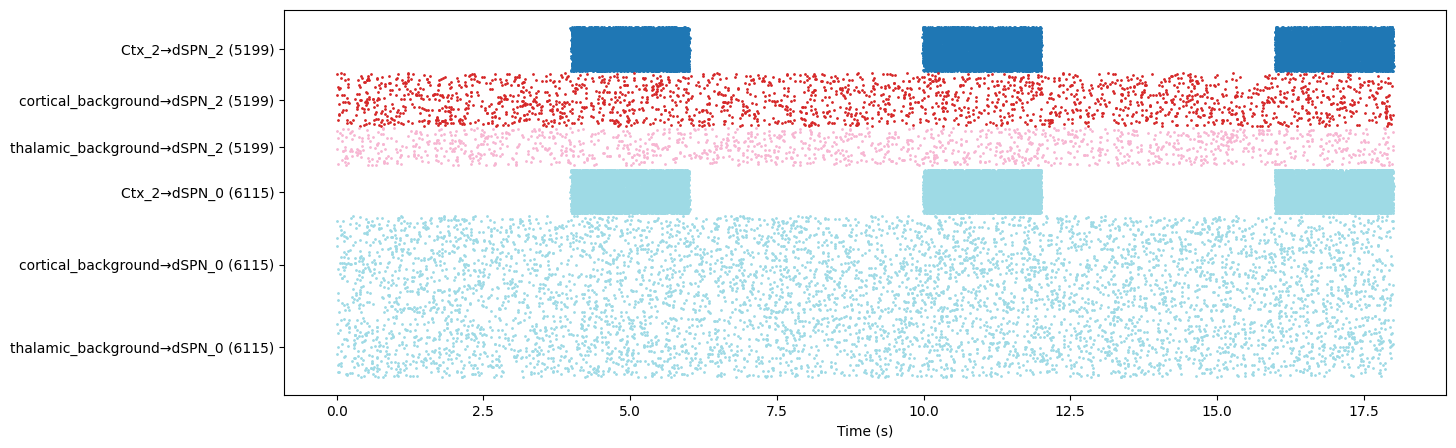

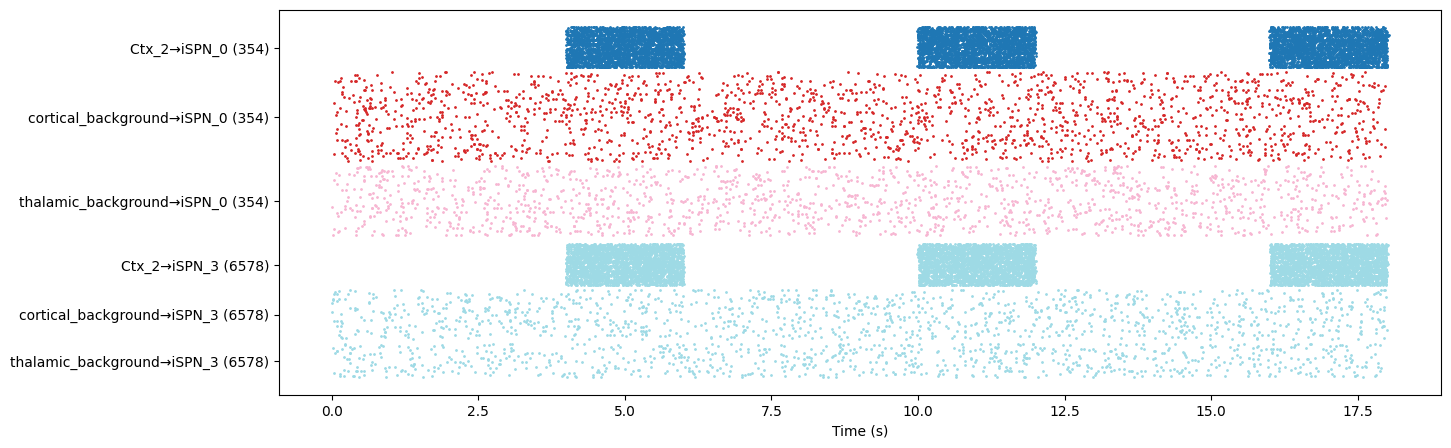

In [4]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, network_file)
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

In [5]:
# Cleanup
pn = None
spi = None

# Plot neuron activity

## With lateral inhibtion

In [6]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_with_synapses)# 

# spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_1/simulation/output-with-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
0: (dSPN_0, p7aa400d6, m22be6817)
1: (dSPN_0, pe1ec8fbd, mbb8e5b24)
5: (dSPN_0, p1863c9a5, mf702205f)
8: (dSPN_0, pb0529fb9, m37886c78)
9: (dSPN_0, pe6ec2d4b, m22be6817)
10: (dSPN_0, p7aa400d6, m37886c78)
12: (dSPN_0, p1863c9a5, m22be6817)
15: (dSPN_0, p510bab86, m22be6817)
16: (dSPN_0, pe1ec8fbd, mbb8e5b24)
17: (dSPN_0, pe6ec2d4b, mf702205f)
25: (dSPN_1, p81757e87, mc44c4566)
32: (dSPN_1, p4e92e4bc, m7fe0fbde)
37: (dSPN_2, p185b99a1, m93f282f3)
41: (dSPN_2, p185b99a1, mdf60297d)
46: (dSPN_2, p185b99a1, m93f282f3)
49: (dSPN_2, p185b99a1, m93f282f3)
50: (dSPN_2, p185b99a1, mdf60297d)
51: (dSPN_2, p185b99a1, m91d5391a)
137: (dSPN_0, pb0529fb9, mf702205f)
144: (dSPN_1, p81757e87, mad2e6da1)
173: (dSPN_2, p185b99a1, m93f282f3)
185: (dSPN_0, p1863c9a5, m9fda9b20)
193: (dSPN_0, pb0529fb9, mbb8e5b24)
194: (dSPN_0, pe1ec8fbd, mbb8e

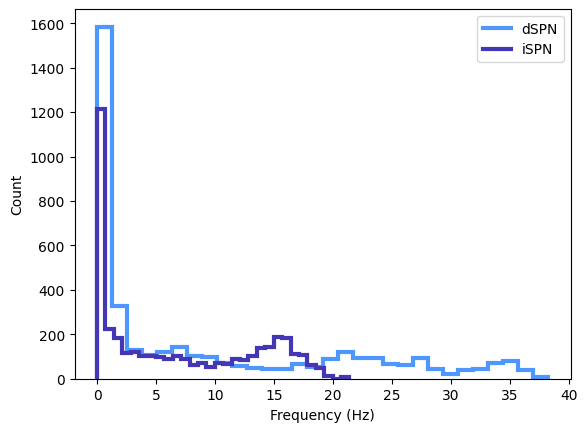

In [7]:
spr.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/sten_1/figures/spike-frequency-pop-units1-2.pdf


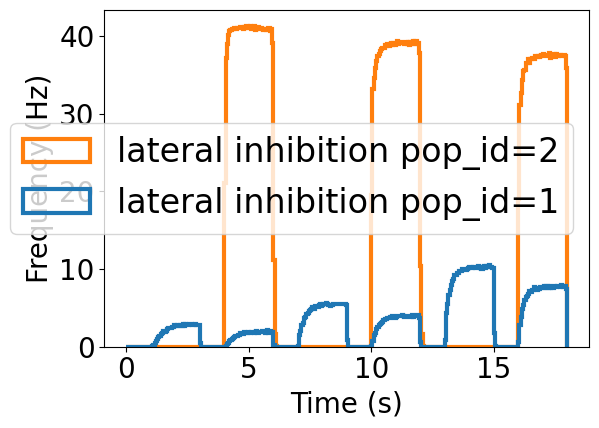

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [8]:
spr.plot_spike_histogram(label_text="lateral inhibition pop_id=")

## Without lateral inhibition

In [9]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr_no = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_no_synapses)

# spr_no.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_1/simulation/output-no-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
0: (dSPN_0, p7aa400d6, m22be6817)
1: (dSPN_0, pe1ec8fbd, mbb8e5b24)
2: (dSPN_0, p1863c9a5, m9fda9b20)
5: (dSPN_0, p1863c9a5, mf702205f)
6: (dSPN_0, pb0529fb9, mbb8e5b24)
8: (dSPN_0, pb0529fb9, m37886c78)
10: (dSPN_0, p7aa400d6, m37886c78)
12: (dSPN_0, p1863c9a5, m22be6817)
15: (dSPN_0, p510bab86, m22be6817)
16: (dSPN_0, pe1ec8fbd, mbb8e5b24)
25: (dSPN_1, p81757e87, mc44c4566)
32: (dSPN_1, p4e92e4bc, m7fe0fbde)
37: (dSPN_2, p185b99a1, m93f282f3)
41: (dSPN_2, p185b99a1, mdf60297d)
46: (dSPN_2, p185b99a1, m93f282f3)
49: (dSPN_2, p185b99a1, m93f282f3)
50: (dSPN_2, p185b99a1, mdf60297d)
51: (dSPN_2, p185b99a1, m91d5391a)
72: (iSPN_0, p581376d6, m6486ed26)
134: (dSPN_0, p510bab86, m22be6817)
137: (dSPN_0, pb0529fb9, mf702205f)
140: (dSPN_0, p7aa400d6, mf702205f)
141: (dSPN_1, p75cab3ca, m71f9efc2)
144: (dSPN_1, p81757e87, mad2e6da1

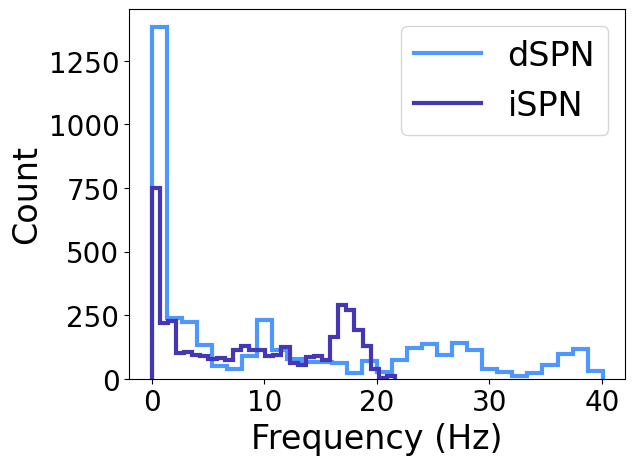

In [10]:
spr_no.plot_firing_frequency_distribution(bins=30)

Saving figure ../networks/sten_1/figures/spike-frequency-pop-units1-2.pdf


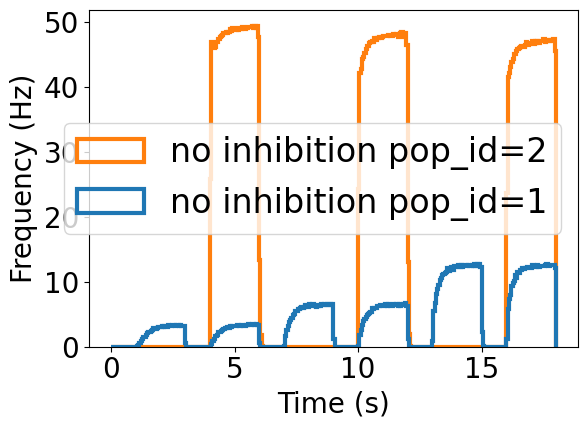

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [11]:
spr_no.plot_spike_histogram(label_text="no inhibition pop_id=")

# Summarising difference in activity (with and without lateral inhibition)

Saving figure ../networks/sten_1/figures/spike-frequency-pop-units1-2.pdf


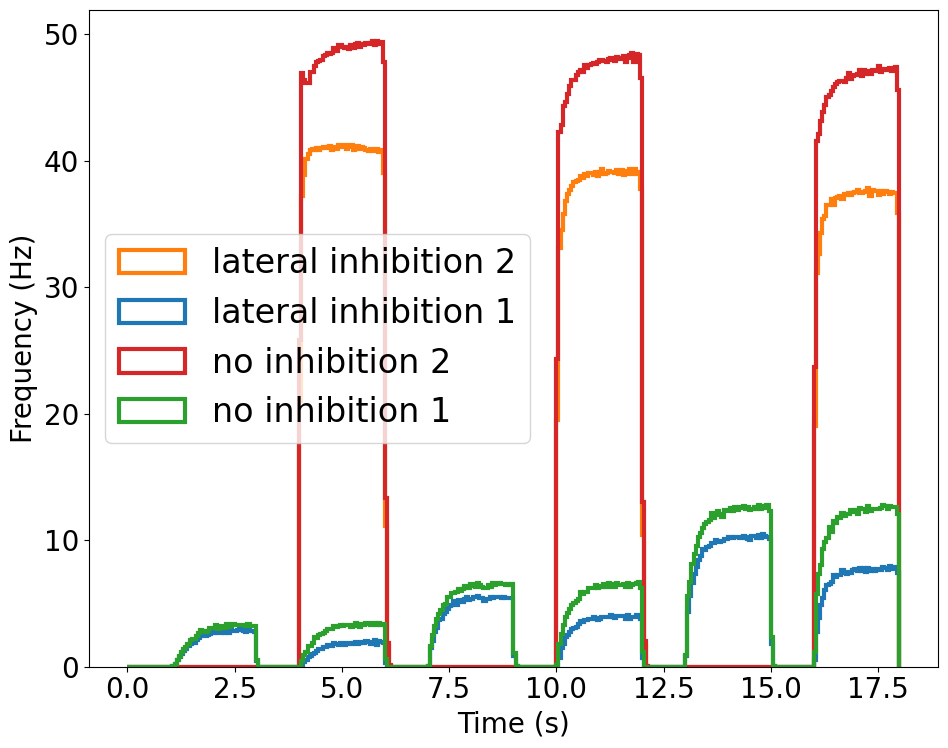

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [12]:
ax = spr.plot_spike_histogram(label_text="lateral inhibition ", show_figure=False, save_figure=False, fig_size=(10,8))
spr_no.plot_spike_histogram(ax=ax, label_text="no inhibition ", show_figure=True, save_figure=True)

In [13]:
time_ranges = [(2,3), (5,6), (8,9), (11,12), (14,15), (17,18)]

pop_id1 = spr.snudda_load.get_population_unit_members(population_unit=1)
pop_id2 = spr.snudda_load.get_population_unit_members(population_unit=2)

with_lat_freq_table1 = spr.snudda_simulation_load.get_frequency(neuron_id=pop_id1, time_ranges=time_ranges)
with_lat_freq_table2 = spr.snudda_simulation_load.get_frequency(neuron_id=pop_id2, time_ranges=time_ranges)

no_lat_freq_table1 = spr_no.snudda_simulation_load.get_frequency(neuron_id=pop_id1, time_ranges=time_ranges)
no_lat_freq_table2 = spr_no.snudda_simulation_load.get_frequency(neuron_id=pop_id2, time_ranges=time_ranges)



In [14]:
with_lat_freq1_mean = np.mean(with_lat_freq_table1, axis=0)
with_lat_freq2_mean = np.mean(with_lat_freq_table2, axis=0)
no_lat_freq1_mean = np.mean(no_lat_freq_table1, axis=0)
no_lat_freq2_mean = np.mean(no_lat_freq_table2, axis=0)

n1_cells = with_lat_freq_table1.shape[0]
n2_cells = with_lat_freq_table2.shape[0]

# Standard error of the mean
with_lat_freq1_std = np.std(with_lat_freq_table1, axis=0) / np.sqrt(n1_cells)
with_lat_freq2_std = np.std(with_lat_freq_table2, axis=0) / np.sqrt(n2_cells)
no_lat_freq1_std = np.std(no_lat_freq_table1, axis=0) / np.sqrt(n1_cells)
no_lat_freq2_std = np.std(no_lat_freq_table2, axis=0) / np.sqrt(n2_cells)

In [15]:
print("With lateral inhibition")
for freq1_mean, freq1_std, freq2_mean, freq2_std in zip(with_lat_freq1_mean, with_lat_freq1_std, with_lat_freq2_mean,with_lat_freq2_std):
    print(f"Freq 1: {freq1_mean:.2f} +/- {freq1_std:.2f}\tFreq 2: {freq2_mean:.2f} +/- {freq2_std:.2f}")

With lateral inhibition
Freq 1: 2.80 +/- 0.09	Freq 2: 0.00 +/- 0.00
Freq 1: 1.89 +/- 0.07	Freq 2: 40.85 +/- 0.49
Freq 1: 5.45 +/- 0.14	Freq 2: 0.00 +/- 0.00
Freq 1: 3.93 +/- 0.12	Freq 2: 39.04 +/- 0.49
Freq 1: 10.24 +/- 0.20	Freq 2: 0.00 +/- 0.00
Freq 1: 7.71 +/- 0.18	Freq 2: 37.44 +/- 0.49


In [16]:
print("No lateral inhibition")
for freq1_mean, freq1_std, freq2_mean, freq2_std in zip(no_lat_freq1_mean, no_lat_freq1_std, no_lat_freq2_mean,no_lat_freq2_std):
    print(f"Freq 1: {freq1_mean:.2f} +/- {freq1_std:.2f}\tFreq 2: {freq2_mean:.2f} +/- {freq2_std:.2f}")

No lateral inhibition
Freq 1: 3.23 +/- 0.10	Freq 2: 0.00 +/- 0.00
Freq 1: 3.32 +/- 0.10	Freq 2: 49.09 +/- 0.50
Freq 1: 6.46 +/- 0.16	Freq 2: 0.00 +/- 0.00
Freq 1: 6.45 +/- 0.16	Freq 2: 48.01 +/- 0.51
Freq 1: 12.54 +/- 0.22	Freq 2: 0.00 +/- 0.00
Freq 1: 12.49 +/- 0.22	Freq 2: 47.04 +/- 0.51


In [17]:
with_lat_n_firing1 = np.sum(with_lat_freq_table1 > 0, axis=0)
with_lat_n_firing2 = np.sum(with_lat_freq_table2 > 0, axis=0)

no_lat_n_firing1 = np.sum(no_lat_freq_table1 > 0, axis=0)
no_lat_n_firing2 = np.sum(no_lat_freq_table2 > 0, axis=0)

In [18]:
print("With lateral inhibition")
for n1_active, n2_active in zip(with_lat_n_firing1, with_lat_n_firing2):
    print(f"Neurons active 1: {n1_active}/{n1_cells}\tNeurons active 2: {n2_active}/{n2_cells}")

With lateral inhibition
Neurons active 1: 1236/4000	Neurons active 2: 0/4000
Neurons active 1: 971/4000	Neurons active 2: 3509/4000
Neurons active 1: 1853/4000	Neurons active 2: 0/4000
Neurons active 1: 1438/4000	Neurons active 2: 3426/4000
Neurons active 1: 2538/4000	Neurons active 2: 0/4000
Neurons active 1: 2084/4000	Neurons active 2: 3351/4000


In [19]:
print("No lateral inhibition")
for n1_active, n2_active in zip(no_lat_n_firing1, no_lat_n_firing2):
    print(f"Neurons active 1: {n1_active}/{n1_cells}\tNeurons active 2: {n2_active}/{n2_cells}")

No lateral inhibition
Neurons active 1: 1352/4000	Neurons active 2: 0/4000
Neurons active 1: 1388/4000	Neurons active 2: 3694/4000
Neurons active 1: 2111/4000	Neurons active 2: 0/4000
Neurons active 1: 2106/4000	Neurons active 2: 3644/4000
Neurons active 1: 2794/4000	Neurons active 2: 0/4000
Neurons active 1: 2763/4000	Neurons active 2: 3599/4000


In [20]:
# Cleanup
spr = None
spr_no = None

# Plotting the traces for the two cases to make sure it looks ok

In [21]:
from snudda.plotting.plot_traces import PlotTraces
pt_with_syn = PlotTraces(output_file=simulation_file_with_synapses, network_file=network_file)
# Use trace_id to specify which traces


Loading network info from ../networks/sten_1/network-synapses-minimal.hdf5
Loading input info from ../networks/sten_1/input-spikes.hdf5
Loading ../networks/sten_1/simulation/output-with-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
0: (dSPN_0, p7aa400d6, m22be6817)
1: (dSPN_0, pe1ec8fbd, mbb8e5b24)
5: (dSPN_0, p1863c9a5, mf702205f)
8: (dSPN_0, pb0529fb9, m37886c78)
9: (dSPN_0, pe6ec2d4b, m22be6817)
10: (dSPN_0, p7aa400d6, m37886c78)
12: (dSPN_0, p1863c9a5, m22be6817)
15: (dSPN_0, p510bab86, m22be6817)
16: (dSPN_0, pe1ec8fbd, mbb8e5b24)
17: (dSPN_0, pe6ec2d4b, mf702205f)
25: (dSPN_1, p81757e87, mc44c4566)
32: (dSPN_1, p4e92e4bc, m7fe0fbde)
37: (dSPN_2, p185b99a1, m93f282f3)
41: (dSPN_2, p185b99a1, mdf60297d)
46: (dSPN_2, p185b99a1, m93f282f3)
49: (dSPN_2, p185b99a1, m93f282f3)
50: (dSPN_2, p185b99a1, mdf60297d)
51: (dSPN_2, p185b99a1, m91d5391a)
137: (dSPN_0, pb0529fb9, mf702205f)
144: (dSPN_1, p81757e87, mad2e6da1)
17

In [22]:
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [ 3  4 13 14 18 19 21 23 24 26 28 29 30 33 35 38 39 40 43 44 45 47 52 56
 57 61 63 66 68 69]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-iSPN.pdf


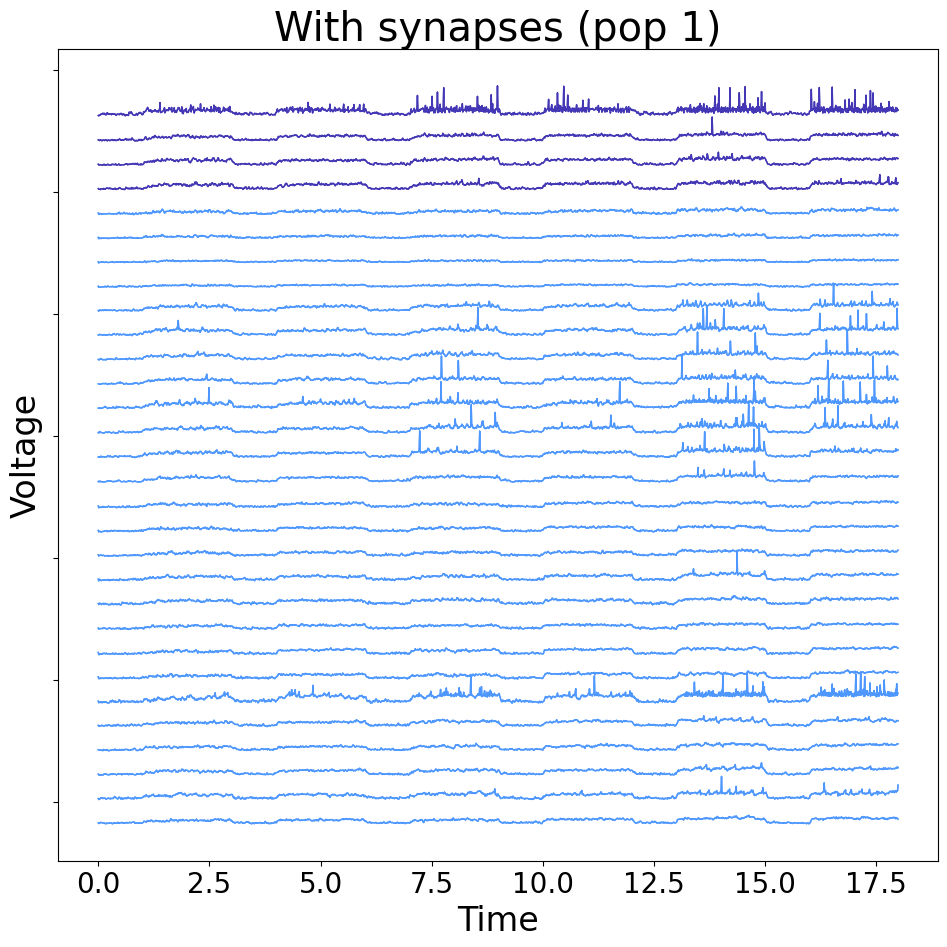

In [23]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 1)",
                            trace_id=pop_id_1)

Plotting traces: [ 0  1  2  5  6  7  8  9 10 11 12 15 16 17 20 22 25 27 31 32 34 36 37 41
 42 46 48 49 50 51]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-traces.pdf


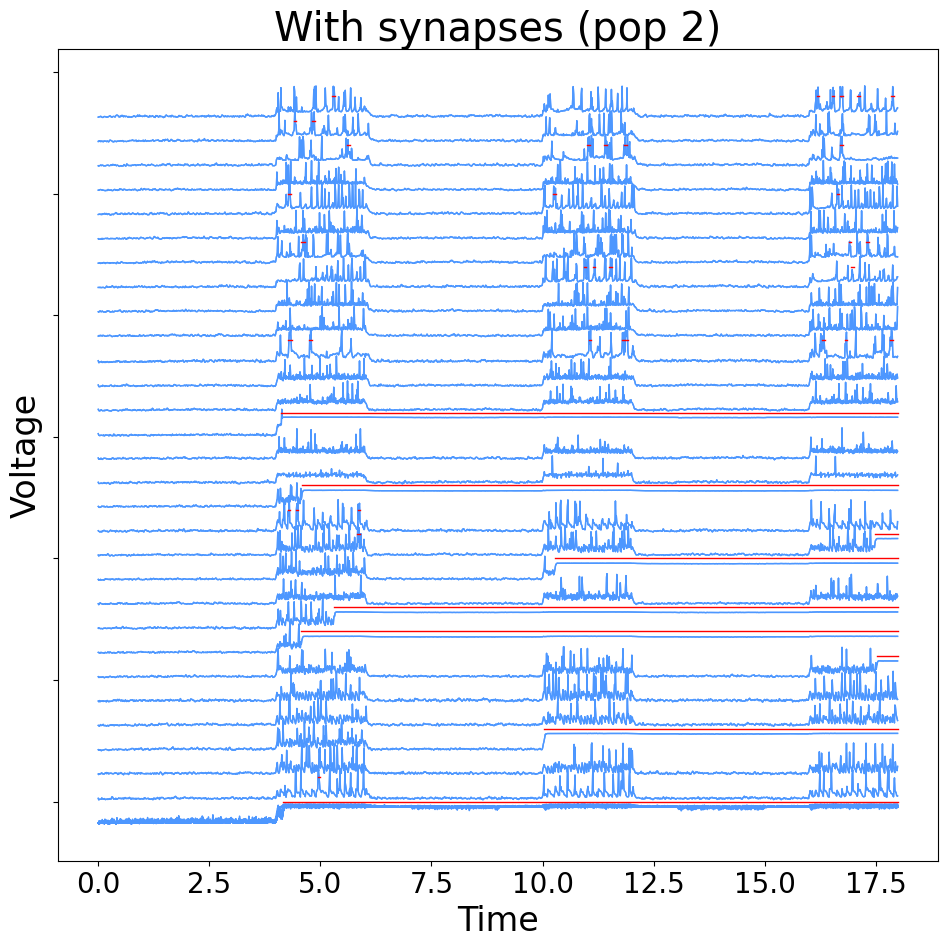

In [24]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 2)",
                            trace_id=pop_id_2)

In [25]:
from snudda.plotting.plot_traces import PlotTraces
pt_no_syn = PlotTraces(output_file=simulation_file_no_synapses, network_file=network_file)
# Use trace_id to specify which traces

Loading network info from ../networks/sten_1/network-synapses-minimal.hdf5
Loading input info from ../networks/sten_1/input-spikes.hdf5
Loading ../networks/sten_1/simulation/output-no-synapses-sten_1-A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
0: (dSPN_0, p7aa400d6, m22be6817)
1: (dSPN_0, pe1ec8fbd, mbb8e5b24)
2: (dSPN_0, p1863c9a5, m9fda9b20)
5: (dSPN_0, p1863c9a5, mf702205f)
6: (dSPN_0, pb0529fb9, mbb8e5b24)
8: (dSPN_0, pb0529fb9, m37886c78)
10: (dSPN_0, p7aa400d6, m37886c78)
12: (dSPN_0, p1863c9a5, m22be6817)
15: (dSPN_0, p510bab86, m22be6817)
16: (dSPN_0, pe1ec8fbd, mbb8e5b24)
25: (dSPN_1, p81757e87, mc44c4566)
32: (dSPN_1, p4e92e4bc, m7fe0fbde)
37: (dSPN_2, p185b99a1, m93f282f3)
41: (dSPN_2, p185b99a1, mdf60297d)
46: (dSPN_2, p185b99a1, m93f282f3)
49: (dSPN_2, p185b99a1, m93f282f3)
50: (dSPN_2, p185b99a1, mdf60297d)
51: (dSPN_2, p185b99a1, m91d5391a)
72: (iSPN_0, p581376d6, m6486ed26)
134: (dSPN_0, p510bab86, m22be6817)
137: (

In [26]:
pop_id_1 = pt_no_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_no_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

Plotting traces: [ 3  4 13 14 18 19 21 23 24 26 28 29 30 33 35 38 39 40 43 44 45 47 52 56
 57 61 63 66 68 69]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-iSPN.pdf


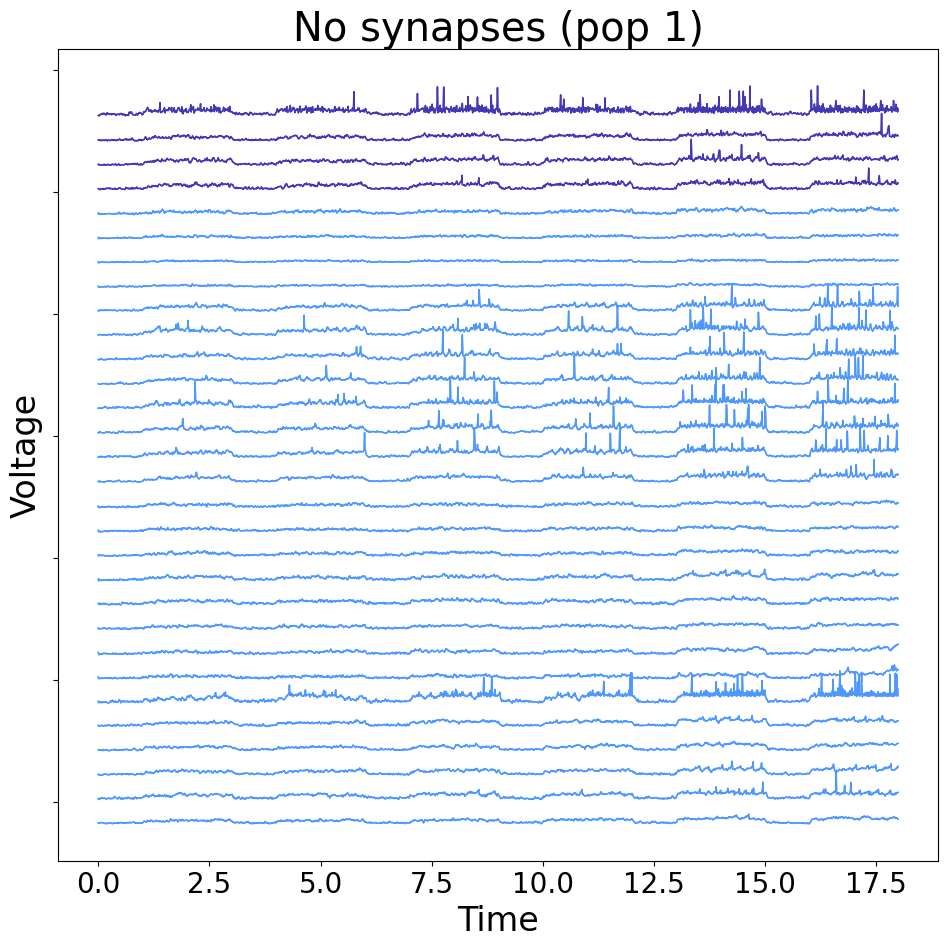

In [27]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 1)",
                           trace_id=pop_id_1)

Plotting traces: [ 0  1  2  5  6  7  8  9 10 11 12 15 16 17 20 22 25 27 31 32 34 36 37 41
 42 46 48 49 50 51]
Plotted 30 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-traces.pdf


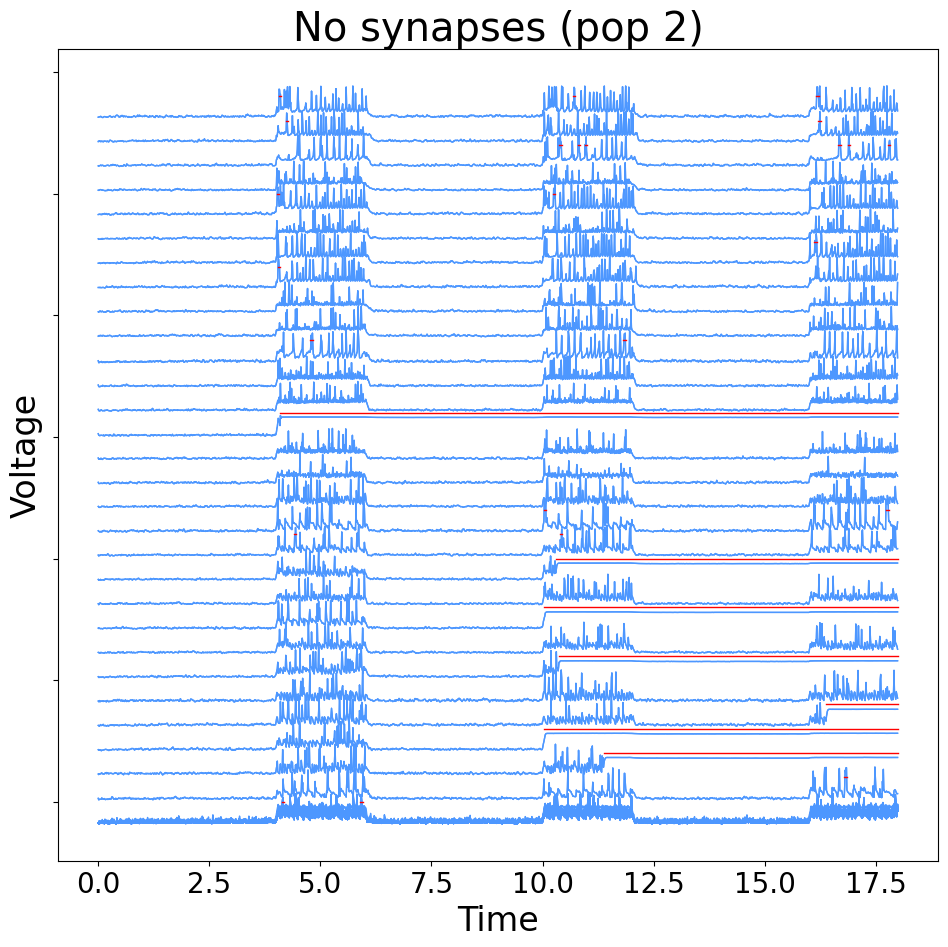

In [28]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 2)",
                           trace_id=pop_id_2)

# Plot neuron with depolarisation block

In [29]:
bad_idx_with_syn = np.unique([x[0] for x in pt_with_syn.output_load.depolarisation_block])
bad_idx_no_syn = np.unique([x[0] for x in pt_no_syn.output_load.depolarisation_block])

# Should be same network (with syn and without syn)
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2)

bad_idx_with_syn_1 = np.intersect1d(bad_idx_with_syn, pop_id_1)
bad_idx_with_syn_2 = np.intersect1d(bad_idx_with_syn, pop_id_2)

bad_idx_no_syn_1 = np.intersect1d(bad_idx_no_syn, pop_id_1)
bad_idx_no_syn_2 = np.intersect1d(bad_idx_no_syn, pop_id_2)

Plotting traces: [1129 1710 2078 2315 2413 2471 3035 4114 4784 5167 5373 6224 7309 7443
 7833]
Plotted 15 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-iSPN.pdf


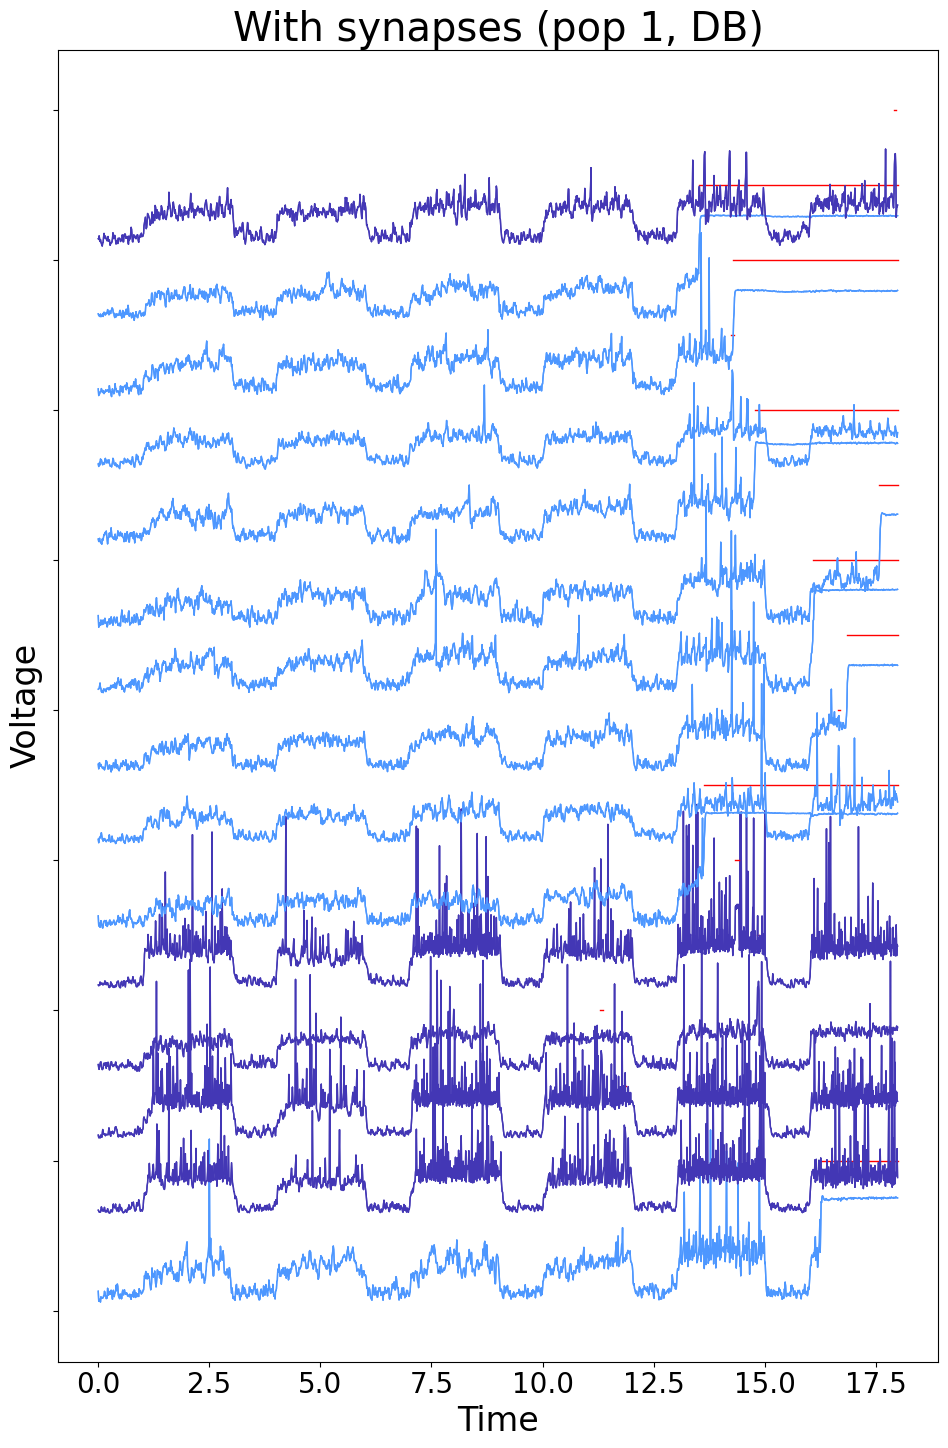

In [30]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 1, DB)",
                            trace_id=bad_idx_with_syn_1)

Plotting traces: [   0    1    5    8    9   10   12   15   16   17   25   32   37   41
   46   49   50   51  137  144  173  185  193  194  199  203  207  209
  211  225  232  233  236  240  241  246  261  272  287  293  294  296
  371  489  491  494  500  502  503  530  533  535  539  544  549  557
  558  560  567  576  595  597  600  607  609  611  615  616  735  737
  743  744  749  756  758  764  835  837  844  846  849  855  856  900
  901  908  909  911  916  917  918  920  925  929  944  949  952  953
  957  993 1012 1084 1087 1090 1092 1096 1098 1102 1106 1110 1126 1133
 1138 1139 1145 1146 1151 1156 1162 1166 1167 1174 1175 1181 1184 1186
 1188 1192 1216 1240 1252 1386 1390 1395 1401 1403 1405 1416 1417 1418
 1422 1424 1427 1441 1444 1446 1457 1458 1459 1466 1468 1472 1474 1475
 1477 1479 1482 1484 1495 1497 1562 1576 1581 1748 1758 1763 1766 1769
 1771 1776 1778 1782 1786 1787 1789 1790 1791 1792 1793 1794 1796 1809
 1811 1822 1824 1831 1835 1838 1848 1850 1853 1858 1859 1866

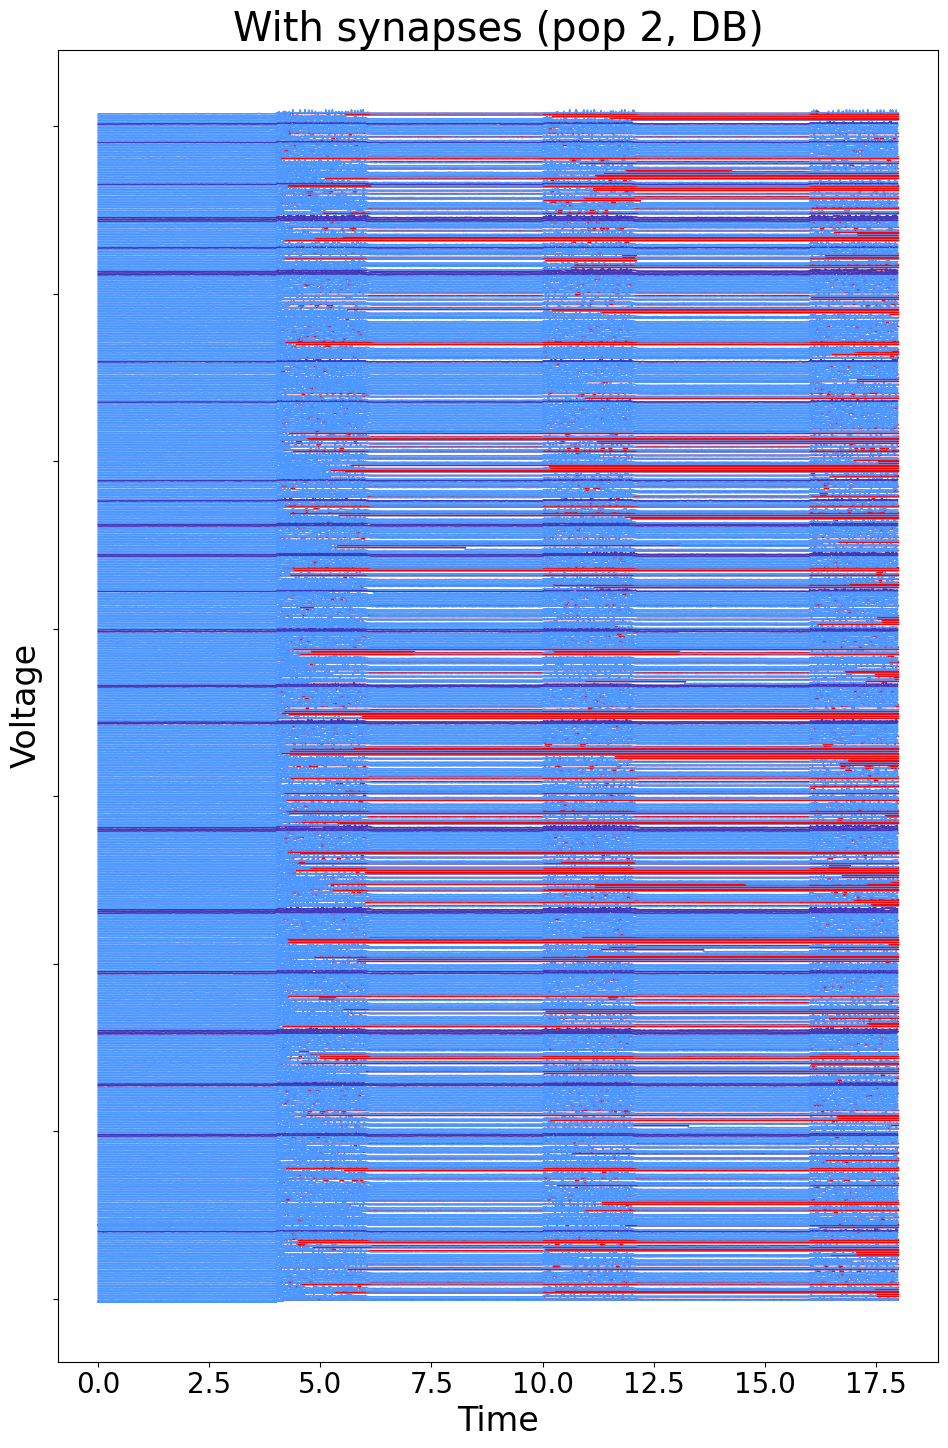

In [31]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 2, DB)",
                            trace_id=bad_idx_with_syn_2)

Plotting traces: [ 198  610  730  843 1007 1140 1159 1371 2304 2413 2782 3450 3876 4214
 4429 4856 5131 5210 5260 5476 5696 6184 6401 7045 7526 7574 7874]
Plotted 27 traces (total 8000)
Saving to figure /home/hjorth/HBP/Snudda/examples/parallel/KTH_PDC/lateral_inhibition/networks/sten_1/figures/Network-voltage-trace--dSPN-iSPN.pdf


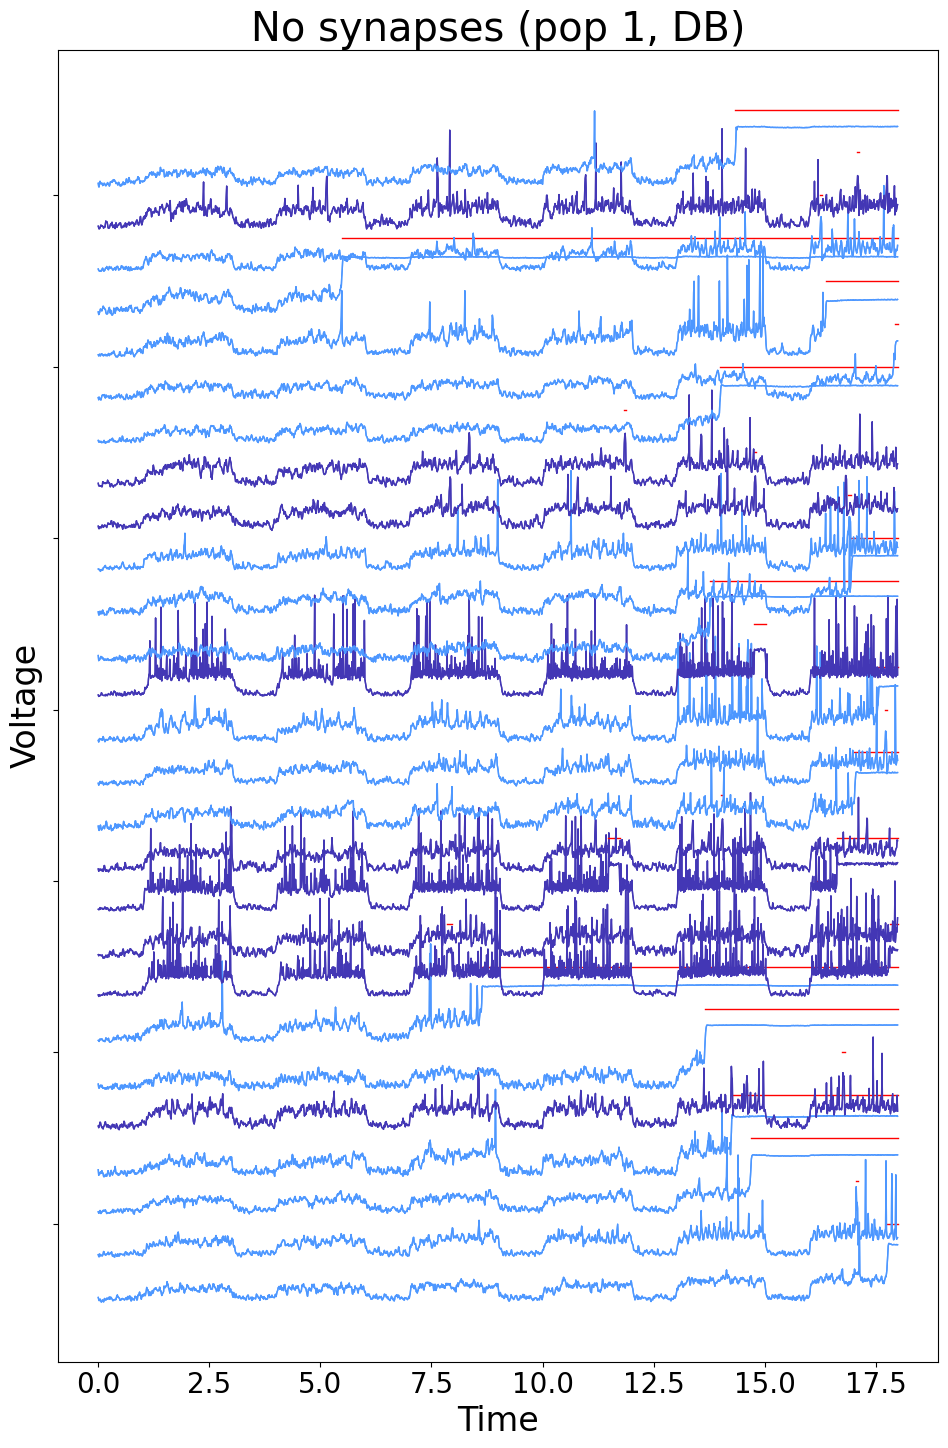

In [32]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 1, DB)",
                           trace_id=bad_idx_no_syn_1)

Plotting traces: [   0    1    2    5    6    8   10   12   15   16   25   32   37   41
   46   49   50   51   72  134  137  140  141  144  173  182  185  188
  189  194  197  199  203  206  207  209  211  225  232  233  236  240
  241  246  251  260  261  294  492  493  494  498  500  502  503  531
  533  549  550  556  557  559  560  564  576  584  593  595  597  600
  607  611  615  616  735  737  739  744  745  749  756  758  835  839
  844  846  849  855  856  899  901  911  914  915  916  917  918  920
  929  934  944  949  952  953  957  973  993 1001 1084 1090 1091 1092
 1096 1098 1100 1102 1103 1106 1107 1110 1112 1125 1126 1133 1138 1139
 1145 1146 1151 1156 1162 1166 1167 1174 1175 1181 1186 1188 1192 1242
 1390 1395 1401 1403 1405 1416 1417 1418 1420 1422 1424 1427 1429 1434
 1438 1441 1442 1444 1446 1452 1454 1457 1463 1466 1468 1472 1477 1479
 1482 1484 1495 1497 1504 1558 1578 1748 1756 1762 1763 1765 1767 1768
 1769 1771 1778 1786 1787 1789 1790 1791 1792 1793 1802 1809

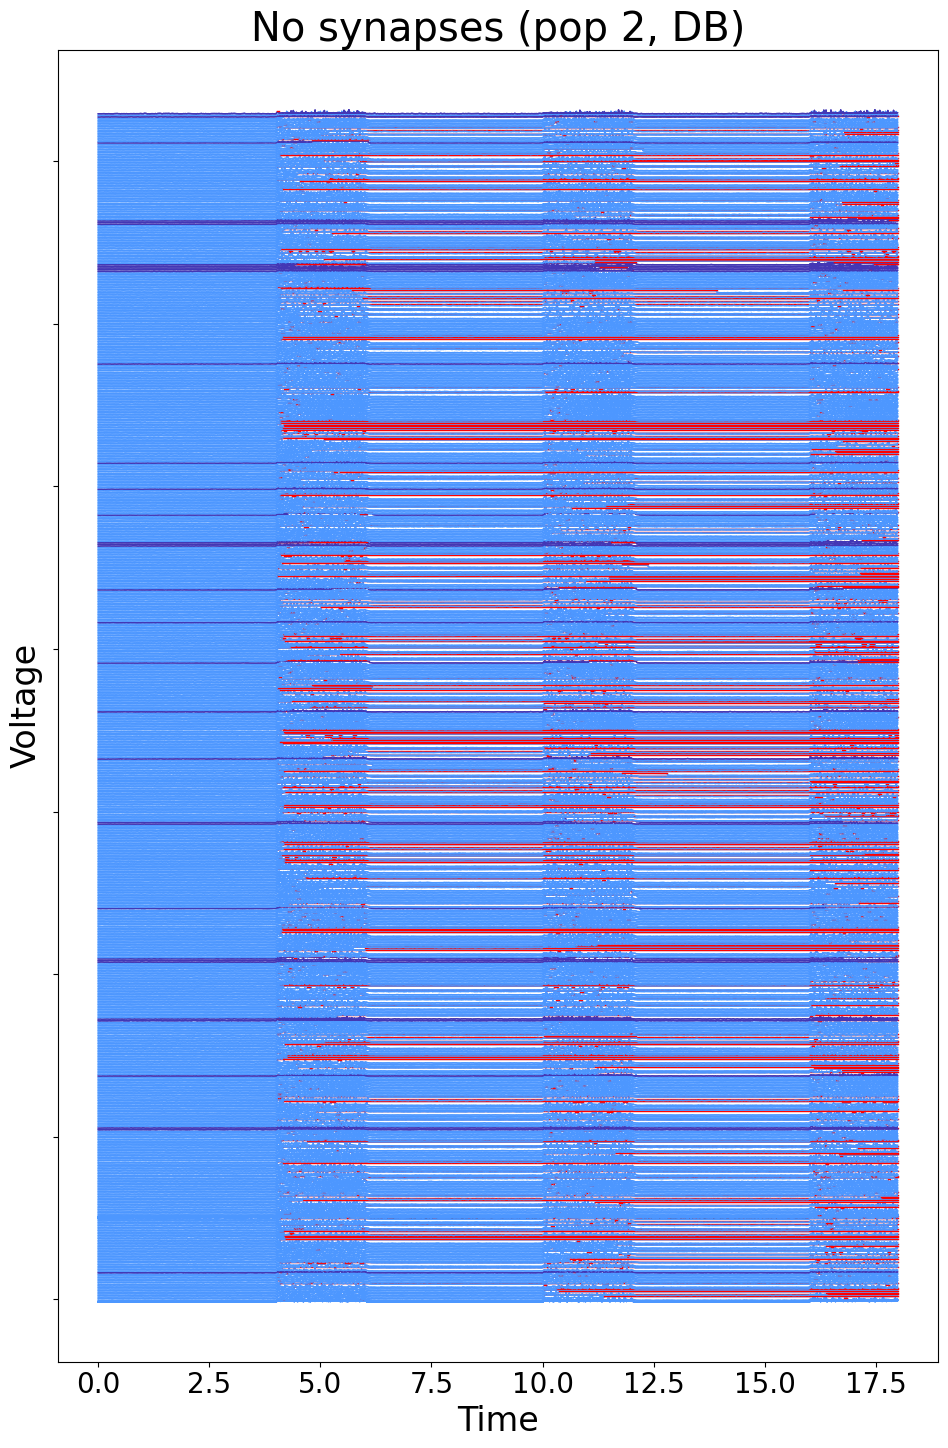

In [33]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 2, DB)",
                           trace_id=bad_idx_no_syn_2)